# Performing Clustering on Crime Data

## Hierarchial Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv("crime_data.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data1 = data.rename(columns={'Unnamed: 0': 'City'})

In [5]:
data1.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(data1.iloc[:,1:])

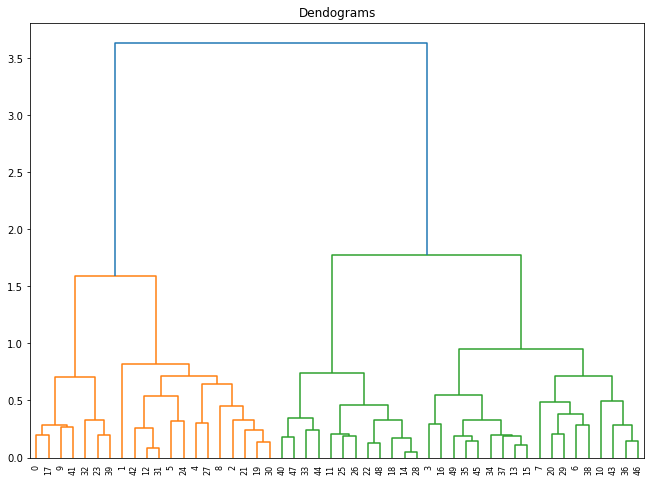

In [9]:
plt.figure(figsize=(11,8))
plt.title("Dendograms")
dendogram = sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [10]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [11]:
y_hc = hc.fit_predict(df_norm)

In [12]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [14]:
clusters.value_counts()

Clusters
0           47
3            1
2            1
1            1
dtype: int64

In [15]:
data['hc_clust']= clusters

In [16]:
data.iloc[:,1:7].groupby(data.hc_clust).mean()

,Murder,Assault,UrbanPop,Rape,hc_clust
hc_clust,,,,,
0,7.619149,163.87234,65.468085,20.625532,0
1,5.900000,238.00000,72.000000,15.800000,1
2,15.400000,335.00000,80.000000,31.900000,2
3,10.000000,263.00000,48.000000,44.500000,3


Text(0.5, 0.98, 'Comparison of cities in respective clusters')

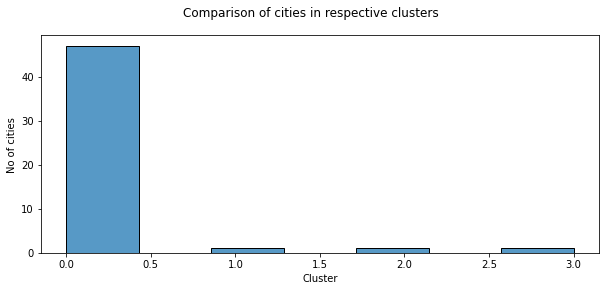

In [17]:
plt.figure(figsize=(10,4))
sns.histplot (x='hc_clust', data=data)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('Comparison of cities in respective clusters')

# K-Means Clustering

## Elbow method for calculating the optimal number of clusters

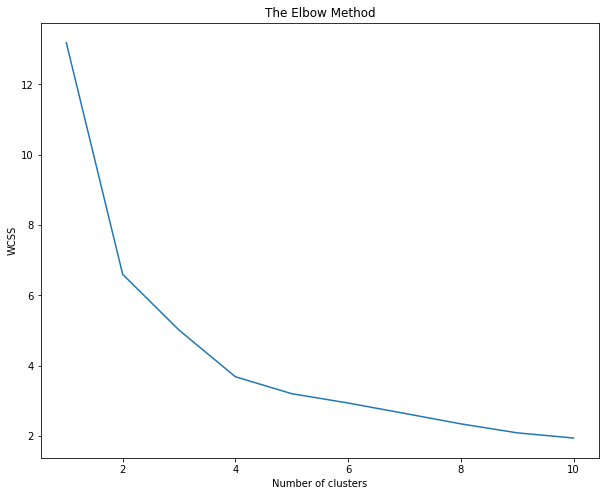

In [18]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# The number of clusters concluded from elbow curve is 4

In [20]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)
model.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [22]:
km = pd.Series(model.labels_) 
data['kclust']= km 
data.iloc[:,1:5].groupby(data.kclust).mean()

,Murder,Assault,UrbanPop,Rape
kclust,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

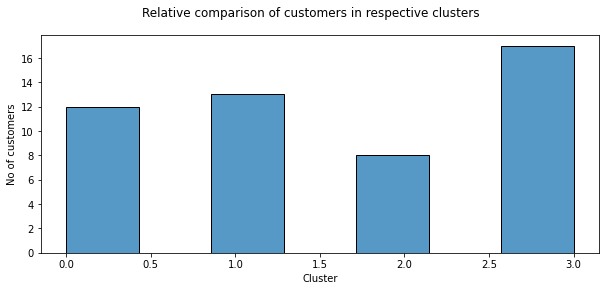

In [23]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=data)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

# DBSCAN Clustering

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [25]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_clust,kclust
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,3,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
 5   hc_clust    50 non-null     int64  
 6   kclust      50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB


In [28]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(data.iloc[:,1:5]))
x

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [29]:
dbscan=DBSCAN(eps=.5,min_samples=3).fit(x)
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [30]:
data['dclust']=pd.Series(dbscan.labels_)
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_clust,kclust,dclust
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,3,0,-1
2,Arizona,8.1,294,80,31.0,0,0,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,0,0,0


In [31]:
data.iloc[:,1:5].groupby(data.dclust).mean()

,Murder,Assault,UrbanPop,Rape
dclust,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143
